In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = "automobileEDA.csv"
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
X = df[['highway-mpg','engine-size','horsepower']]
Y = df['price']

print(X)

     highway-mpg  engine-size  horsepower
0             27          130       111.0
1             27          130       111.0
2             26          152       154.0
3             30          109       102.0
4             22          136       115.0
..           ...          ...         ...
196           28          141       114.0
197           25          141       160.0
198           23          173       134.0
199           27          145       106.0
200           25          141       114.0

[201 rows x 3 columns]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
                                                    random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

(0.0, 47542.40859163151)

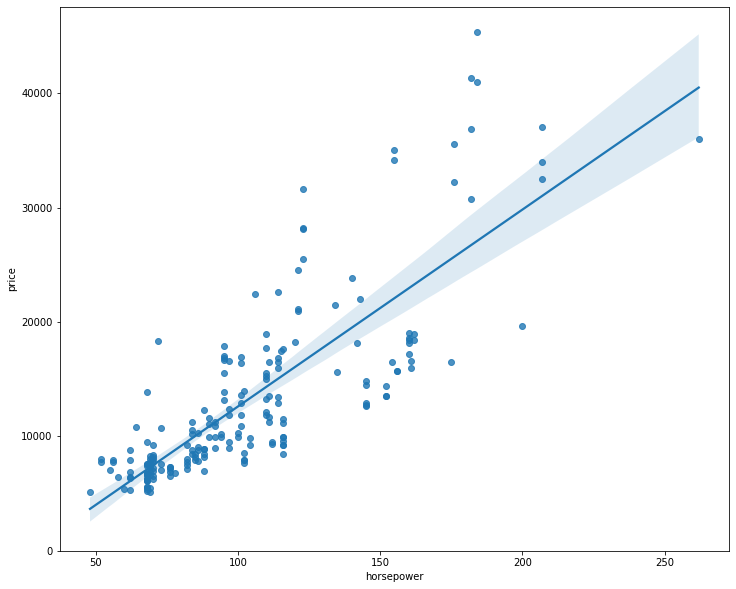

In [ ]:
import seaborn as sns
%matplotlib inline
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="horsepower", y="price",data=df)
plt.ylim(0,)

In [ ]:
lm.fit(X_train, Y_train)
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.7786664847141354


In [ ]:
lm.intercept_
lm.coef_

array([-245.57183071,  120.18251927,    7.09095209])

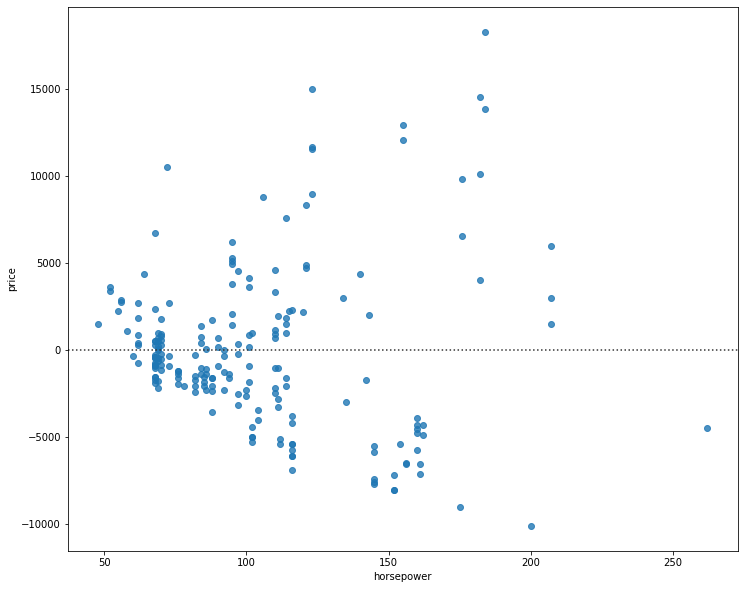

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['horsepower'], y=df['price'])
plt.show()

In [ ]:
Yhat_train=lm.predict(X_train)
Yhat_test=lm.predict(X_test)
print('The output of the first four predicted value for training is: ', Yhat_train[0:4])
print('The output of the first four predicted value for test is: ', Yhat_test[0:4])

The output of the first four predicted value for training is:  [11127.0424873   9719.94335029  5119.96472641  7554.85586487]
The output of the first four predicted value for test is:  [ 5119.96472641 10000.60627524 17168.84767624 21795.04049616]


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
mse_train = mean_squared_error(Y_train, Yhat_train)
mse_test = mean_squared_error(Y_test, Yhat_test)
print('The mean square error of price for predicted train value is:', mse_train)
print('The mean square error of price for predicted test value is:', mse_test)

The mean square error of price for predicted train value is: 12518324.98220051
The mean square error of price for predicted test value is: 17100595.997552816


In [ ]:
r2_train = r2_score(Y_train, Yhat_train)
r2_test = r2_score(Y_test, Yhat_test)
print('The R2 score for predicted train value is:', r2_train)
print('The R2 score for predicted test value is:', r2_test)

The R2 score for predicted train value is: 0.7577016066653511
The R2 score for predicted test value is: 0.8004439814886887
